In [32]:
%load_ext autoreload
%autoreload 2

import pandas as pd
import numpy as np
import umap
import json
import seaborn as sns
import sklearn
import matplotlib.pyplot as plt
import pickle

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [2]:
DATA_PATH = "./data/recipes_raw_nosource_fn.json"

In [71]:
data = pd.read_json(DATA_PATH)
data = data.drop(['picture_link', 'title'])
data = data.dropna(axis=1)

In [ ]:
# i = 0
# for ind, row in data.iterrows():
#     new_ingredients = []
#     for ingredient in data.loc[ind, "ingredients"]:
#         ingredient = ingredient.replace(",", "")
#         ingredient = ingredient.replace(".", "")
#         ingredient = ingredient.replace(";", "")
#         ingredient = ingredient.replace("\"", "")
#         new_ingredients.append(ingredient)
#     if i < 5:
#         print(data.loc[ind, "ingredients"])
#         i+=1
#     else:
#         break
#     print(data.loc[ind, "ingredients"])
#     data.loc[ind, "ingredients"] = new_ingredients

In [72]:
dict_of_words = {}

for ingredients in data.loc['ingredients',:]:
    for ingredient in ingredients:
        for word in ingredient.split():
            word = word.rstrip(",.")
            if not word in dict_of_words.keys():
                dict_of_words[word] = 1
            else:
                dict_of_words[word] += 1

In [74]:
df_words = pd.DataFrame.from_dict(dict_of_words, "index", columns=["count"])
df_words = df_words.sort_values('count', ascending=False)

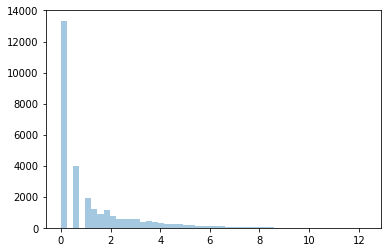

In [75]:
sns.distplot(np.log(df_words.values), kde=False)

In [94]:
top_words = (df_words[10:2010].index.values)
top_words

array(['pepper', '3', 'ground', ..., 'c', 'rustic', 'fully'], dtype=object)

In [ ]:
zero_data = np.zeros(shape=(len(data.T), len(list(top_words))))
final_data = pd.DataFrame(zero_data, columns=list(top_words))

In [ ]:
top_words_set = set(top_words)
i = 0
for ingredients in data.loc['ingredients',:]:
    bigset = set()
    for ingredient in ingredients:
        bigset.update(ingredient.split())
    for ingredient in top_words_set.intersection(bigset):
        final_data.loc[i,ingredient] = 1
    if (i % 1000 == 0):
        print(bigset)
    i += 1

In [118]:
pca = sklearn.decomposition.PCA(n_components=2)
pcaed = pca.fit_transform(final_data)

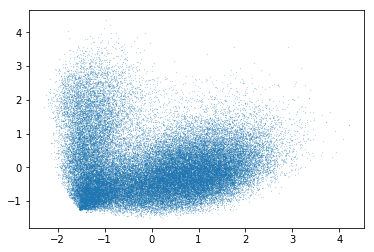

In [129]:
plt.scatter(pcaed[:, 0], pcaed[:, 1], s=0.01)

In [ ]:
embedding = umap.UMAP(n_neighbors=100,
                      min_dist=0.3,
                      metric='correlation').fit_transform(final_data)

In [ ]:
pickle.dump(final_data, open( "final_data.p", "wb" ))
pickle.dump(embedding, open( "embedding.p", "wb" ))